In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import data
from skimage import filters
import cv2 as cv
from PIL import Image, ImageDraw
from math import sqrt
from sklearn.model_selection import train_test_split

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
box_kernel = np.array([[1 / 9, 1 / 9, 1 / 9],
              [1 / 9, 1 / 9, 1 / 9],
              [1 / 9, 1 / 9, 1 / 9]])


box_kernel2 = np.array([[0 / 9, 0 / 9, 0 / 9, 0 / 9, 0 / 9],
              [0 / 9, 1 / 9, 1 / 9, 1 / 9, 0 / 9],
              [0 / 9, 1 / 9, 1 / 9, 1 / 9, 0 / 9],
              [0 / 9, 1 / 9, 1 / 9, 1 / 9, 0 / 9],
              [0 / 9, 0 / 9, 0 / 9, 0 / 9, 0 / 9]])
              

# Gaussian kernel
gaussian_kernel = np.array([[1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256],
                   [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256],
                   [6 / 256, 24 / 256, 36 / 256, 24 / 256, 6 / 256],
                   [4 / 256, 16 / 256, 24 / 256, 16 / 256, 4 / 256],
                   [1 / 256, 4  / 256,  6 / 256,  4 / 256, 1 / 256]])

In [3]:
def convol(image, kernel):


    # Select kernel here:
    kernel = kernel

    # Middle of the kernel
    offset = len(kernel) // 2

    # Create output image
    output_image = np.zeros(np.shape(image))
    # draw = ImageDraw.Draw(output_image)

    # Compute convolution between intensity and kernels
    for x in range(offset, input_image.width - offset):
        for y in range(offset, input_image.height - offset):
            acc = [0, 0, 0]
            for a in range(len(kernel)):
                for b in range(len(kernel)):
                    xn = x + a - offset
                    yn = y + b - offset
                    input_pixels=[]
                    pixel = input_pixels[xn, yn]
                    acc[0] += pixel[0] * kernel[a][b]
                    acc[1] += pixel[1] * kernel[a][b]
                    acc[2] += pixel[2] * kernel[a][b]

            draw.point((x, y), (int(acc[0]), int(acc[1]), int(acc[2])))

    
        
    
    return output_image

In [4]:
def load_az_dataset(datasetPath):
    # Initialize the list of data and labels
    
    data = []
    labels = []
    # Loop over the rows of the A-Z handwritten digit dataset
    for row in open(datasetPath):
        # Parse the label and image from the row
        row = row.split(",")
        label = int(row[0])
        image = np.array([int(x) for x in row[1:]], dtype="uint8")
        # Images are represented as single channel (grayscale) images that are 28x28=784 pixels
        # -- we need to take this flattened 784-d list of numbers and reshape them into a 28x28 matrix
        image = image.reshape((28, 28))
        # Update the list of data and labels
        data.append(image)
        labels.append(label)
    # Convert the data and labels to NumPy arrays
    data = np.array(data, dtype="float32")
    labels = np.array(labels, dtype="int")
    # Return a 2-tuple of the A-Z data and labels
    return data, labels

In [5]:
data, labels = load_az_dataset('a_z_handwritten_data.csv')
idx = np.random.permutation(len(data))
x,y = data[idx], labels[idx]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
x, y, test_size=0.33, random_state=42)

In [7]:
class_names = ['A', 'B', 'C', 'D', 'E',
               'F', 'G', 'H', 'I', 'J',
              'K', 'L', 'M', 'N', 'O', 'P',
              'Q', 'R', 'S', 'T', 'U', 'V',
              'W', 'X', 'Y', 'Z']

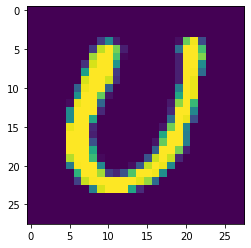

In [8]:
plt.imshow(X_test[0], interpolation='nearest')
plt.show()

In [9]:
y_test[0]

20

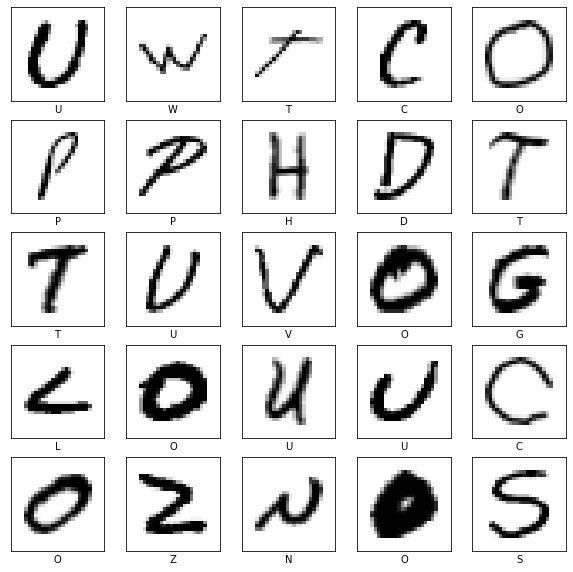

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary, interpolation='nearest')
    plt.xlabel(class_names[y_test[i]])
plt.show()

In [11]:
import tensorflow
import keras
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
tensorflow.version.VERSION

'2.3.1'

In [12]:
X_train.shape

(249542, 28, 28)

In [13]:
X_test.shape

(122909, 28, 28)

In [14]:
X_train = X_train.reshape(249542, 28, 28, 1)
X_test = X_test.reshape(122909, 28, 28, 1)

In [15]:
y_tr = tensorflow.one_hot(y_train, 26)
y_ts = tensorflow.one_hot(y_test, 26)

In [16]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(26, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [18]:
model.fit(X_train, y_tr, epochs=10, validation_data=(X_test, y_ts), callbacks=[early_stop])

Epoch 1/10
7799/7799 [==============================] - 65s 8ms/step - loss: 0.2964 - accuracy: 0.9385 - val_loss: 0.1178 - val_accuracy: 0.9676
Epoch 2/10
7799/7799 [==============================] - 49s 6ms/step - loss: 0.1109 - accuracy: 0.9688 - val_loss: 0.1014 - val_accuracy: 0.9708
Epoch 3/10
7799/7799 [==============================] - 48s 6ms/step - loss: 0.0904 - accuracy: 0.9749 - val_loss: 0.1080 - val_accuracy: 0.9716
Epoch 4/10
7799/7799 [==============================] - 53s 7ms/step - loss: 0.0776 - accuracy: 0.9784 - val_loss: 0.0912 - val_accuracy: 0.9775
Epoch 5/10
7799/7799 [==============================] - 47s 6ms/step - loss: 0.0703 - accuracy: 0.9810 - val_loss: 0.1335 - val_accuracy: 0.9702
Epoch 6/10
7799/7799 [==============================] - 58s 7ms/step - loss: 0.0648 - accuracy: 0.9829 - val_loss: 0.1301 - val_accuracy: 0.9699


In [19]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.296405,0.938455,0.117771,0.967578
1,0.110915,0.968803,0.101386,0.970848
2,0.090433,0.974870,0.107989,0.971556
3,0.077637,0.978424,0.091156,0.977479
4,0.070261,0.981029,0.133459,0.970157


<AxesSubplot:>

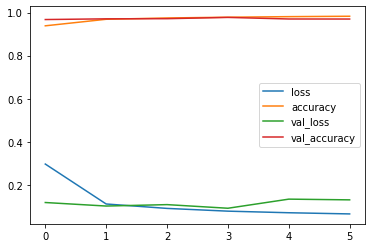

In [20]:
metrics.plot()

<AxesSubplot:>

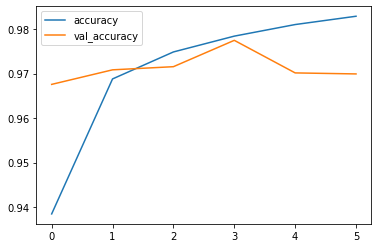

In [21]:
metrics[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

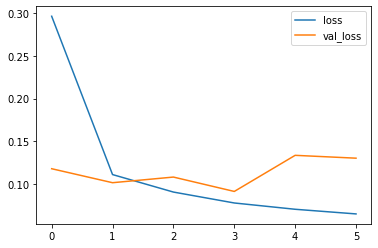

In [22]:
metrics[['loss','val_loss']].plot()

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [25]:
predictions2 = np.argmax(model.predict(X_test), axis=-1)

In [26]:
y_test.shape

(122909,)

In [27]:
y_test[0]

20

In [28]:
predictions[0]

20

In [29]:
print(classification_report(y_test,predictions))
# support = nb element de chaque classe
# recall = 
# f1-score = rapport entre faux positif et 

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      4652
           1       0.92      0.97      0.94      2747
           2       0.98      0.97      0.97      7651
           3       0.83      0.98      0.89      3355
           4       0.94      0.98      0.96      3836
           5       0.94      0.96      0.95       382
           6       0.98      0.89      0.93      1864
           7       0.97      0.90      0.93      2396
           8       0.92      0.96      0.94       378
           9       0.97      0.94      0.96      2820
          10       0.93      0.94      0.94      1812
          11       0.94      0.98      0.96      3822
          12       0.96      0.97      0.97      4029
          13       0.98      0.95      0.97      6274
          14       0.99      0.96      0.98     19173
          15       0.99      0.98      0.98      6352
          16       0.92      0.97      0.94      1895
          17       0.94    

<AxesSubplot:>

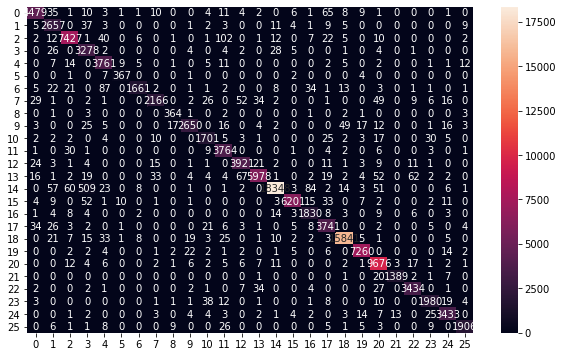

In [30]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='g')

In [31]:
letter_to_predict = X_test[0]
# print(letter_to_predict)

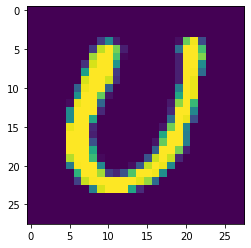

In [32]:
plt.imshow(letter_to_predict.reshape(28,28))

In [33]:
val = model.predict_classes(letter_to_predict.reshape(1,28,28,1))
class_names[val[0]]

'U'

In [34]:
letter_to_predict2 = X_test[77]
val = model.predict_classes(letter_to_predict2.reshape(1,28,28,1))
class_names[val[0]]

'T'

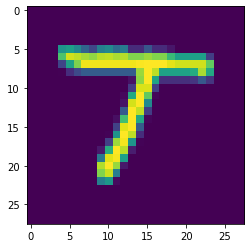

In [35]:
plt.imshow(X_test[77])

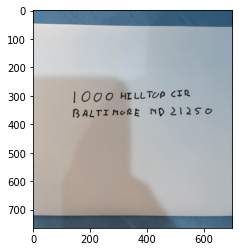

In [36]:
input_image = cv.imread("umbc_address.png")
convolImage = cv.filter2D(input_image, -1, box_kernel)

plt.imshow(convolImage) 
plt.show()  

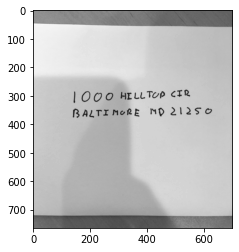

In [37]:
# cv.cvtcolor supprime la dimension couleur de l'image donc image est en noir et blanc
imgray = cv.cvtColor(convolImage, cv.COLOR_BGR2GRAY)

# plt rapplique une couleur de base, pour éviter cela -> cmap='gray'
plt.imshow(imgray, cmap='gray') 
plt.show() 

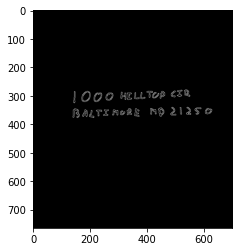

In [38]:
# cv.Canny permet d'appliquer des filtres sur l'image
edges = cv.Canny(imgray, 400, 255)

# findContour récupère les positions des coutours et les insère dans un tableau
contours, hierarchy = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
plt.imshow(edges,cmap='gray')
plt.show() 

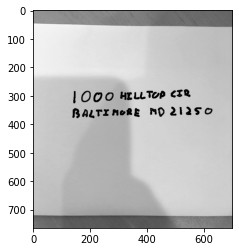

In [39]:
img = cv.drawContours(imgray, contours, -1, (0, 255,75), 2)
plt.imshow(img, cmap='gray')

In [40]:
array = []
ROI_number = 0
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ROI = imgray[y-3:y+h+3, x-3:x+w+3]
    # bitwise inverse les valeurs des pixels (0->255; 255->0)
    # + passage des valeurs de int à float car notre modèle est entrainé sur float
    ROI = cv.bitwise_not(ROI).astype(numpy.float32)
    ret,ROI = cv.threshold(ROI,127,255,cv.THRESH_BINARY)
    out = np.array([cv.resize(ROI, (28,28))])
    array.append(out.reshape(28,28,1))
    ROI_number += 1


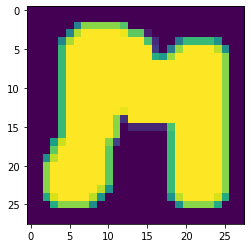

In [41]:
plt.imshow(array[3].reshape(28,28), interpolation='nearest')
plt.show()

In [42]:
val = model.predict_classes(array[3].reshape(1,28,28,1))
class_names[val[0]]
print(val)
print(class_names[19])

[0]
T


In [43]:
values = []
for elem in array: 
    values.append(model.predict_classes(elem.reshape(1,28,28,1)))
values

[array([3]),
 array([11]),
 array([19]),
 array([0]),
 array([19]),
 array([0]),
 array([4]),
 array([1]),
 array([1]),
 array([3]),
 array([15]),
 array([18]),
 array([3]),
 array([20]),
 array([24]),
 array([25]),
 array([3]),
 array([3]),
 array([11]),
 array([19]),
 array([20]),
 array([11]),
 array([7]),
 array([11]),
 array([1]),
 array([19]),
 array([3]),
 array([2]),
 array([8]),
 array([17])]

In [52]:
plt.figure(figsize=(10,10))

for i in range(50):
    value = model.predict_classes(array[i].reshape(1,28,28,1))
    plt.subplot(5,5,i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(array[i].reshape(28,28,1), cmap=plt.cm.binary, interpolation='nearest')
    plt.xlabel(class_names[value[0]])
    #print(value[0])
    #print(class_names[value[0]])
    
plt.show()

ValueError: num must be 1 <= num <= 25, not 26

In [406]:
# sauvegarde du model pour l'exporter 
#!mkdir -p saved_model
model.save('saved_model/wordDetectionModel_V0.h5')

INFO:tensorflow:Assets written to: saved_model/wordDetectionModel_V0/assets
